# AutoEncode 노이즈 제거
---  
* 데이터에 노이즈 제거 활용
* 데이터에

[1] 데이터 불러오기

In [27]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [28]:
set_random_seed(11)

In [29]:
(x_train, y_train), (x_test, y_test) = load_data()

In [30]:
x_train = x_train.reshape(-1, 28 * 28) / 255.
x_test = x_test.reshape(-1, 28 * 28) / 255.

In [31]:
# 데이터셋에 노이즈 추가
# np.rando.normal(loc=0.0, scale = 1.0, size = None)
x_train_noised = x_train + np.random.normal(0, 0.5, size=x_train.shape)
x_test_noised = x_test + np.random.normal(0, 0.5, size=x_test.shape)

# np.clip(array, min, max)
x_train_noised = np.clip(x_train_noised, a_min = 0, a_max = 1)
x_test_noised = np.clip(x_test_noised, a_min = 0, a_max = 1)

Text(0.5, 1.0, 'Noised Image')

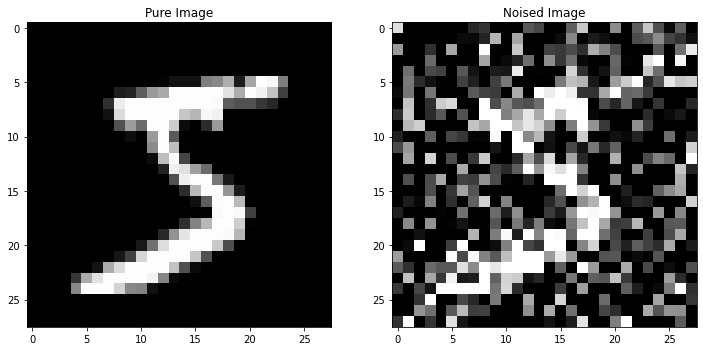

In [32]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title('Pure Image')

plt.subplot(1,2,2)
plt.imshow(x_train_noised[0].reshape(28, 28), cmap='gray')
plt.title('Noised Image')

나머진 동일

In [33]:
def createModel(n_node) :
    model = Sequential()
    model.add(Dense(n_node, activation = 'relu', input_shape = (784,)))
    model.add(Dense(784, activation = 'sigmoid'))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

In [34]:
model1 = createModel(3)
model2 = createModel(12)
model3 = createModel(49)
model4 = createModel(196)
model5 = createModel(784)

In [35]:
model1.summary(), model2.summary(), model4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 3)                 2355      
                                                                 
 dense_21 (Dense)            (None, 784)               3136      
                                                                 
Total params: 5,491
Trainable params: 5,491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 12)                9420      
                                                                 
 dense_23 (Dense)            (None, 784)               10192     
                                                                 
Total params: 19,612
Trainab

(None, None, None)

In [36]:
model1.fit(x_train_noised, x_train, epochs = 1)
model2.fit(x_train_noised, x_train, epochs = 1)
model3.fit(x_train_noised, x_train, epochs = 1)
model4.fit(x_train_noised, x_train, epochs = 1)
model5.fit(x_train_noised, x_train, epochs = 1)

1875/1875 [==============================] - 14s 8ms/step - loss: 0.0220


In [37]:
model1.evaluate(x_test_noised, y_test)
model2.evaluate(x_test_noised, y_test)
model3.evaluate(x_test_noised, y_test)
model4.evaluate(x_test_noised, y_test)
model5.evaluate(x_test_noised, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 27.0151


27.015111923217773

In [38]:
pre_out1 = model1.predict(x_test_noised[0].reshape(-1, 784))
pre_out2 = model2.predict(x_test_noised[0].reshape(-1, 784))
pre_out3 = model3.predict(x_test_noised[0].reshape(-1, 784))
pre_out4 = model4.predict(x_test_noised[0].reshape(-1, 784))
pre_out5 = model5.predict(x_test_noised[0].reshape(-1, 784))

1/1 [==============================] - 0s 42ms/step


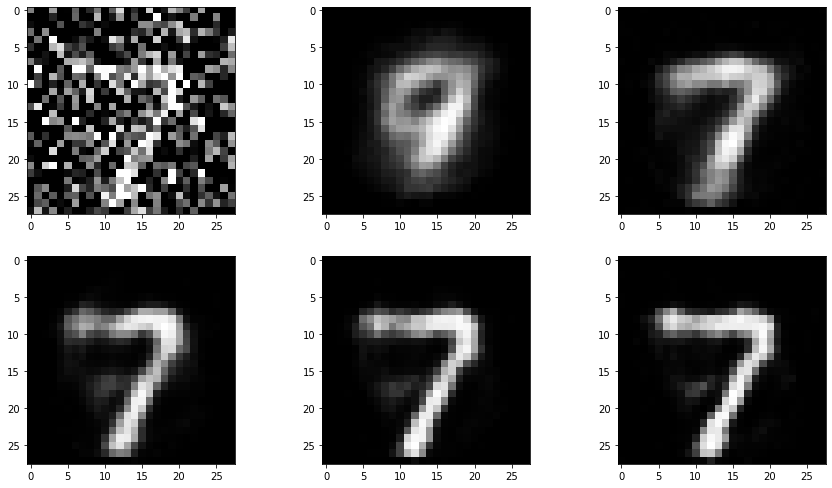

In [39]:
plt.figure(figsize = (15,13))
plt.subplot(3,3,1)
plt.imshow(x_test_noised[0].reshape(28,28), cmap='gray')
plt.title("n_node : 3")

plt.subplot(3,3,2)
plt.imshow(pre_out1.reshape(28,28), cmap='gray')
plt.title("n_node : 12")

plt.subplot(3,3,3)
plt.imshow(pre_out2.reshape(28,28), cmap='gray')
plt.title("n_node : 49")

plt.subplot(3,3,4)
plt.imshow(pre_out3.reshape(28,28), cmap='gray')
plt.title("n_node : 3")

plt.subplot(3,3,5)
plt.imshow(pre_out4.reshape(28,28), cmap='gray')
plt.title("n_node : ")

plt.subplot(3,3,6)
plt.imshow(pre_out5.reshape(28,28), cmap='gray')
plt.title("n_node : 784")
